In [1]:
import math
import matplotlib.pyplot as plt

### Question 1 (Fixed Point Iteration)

Solve $exp(−x) − x = 0$ using fixed-point method, accurate up to 4 places in decimal.

In [2]:
def f_1(x): 
    return math.exp(-x) - x

def g_1(x): 
    return math.exp(-x)

In [3]:
# f and g
f = f_1
g = g_1

# parameters
a = 0
b = 1
iterations = 10
x = [a + (b - a) * i / 99 for i in range(100)]

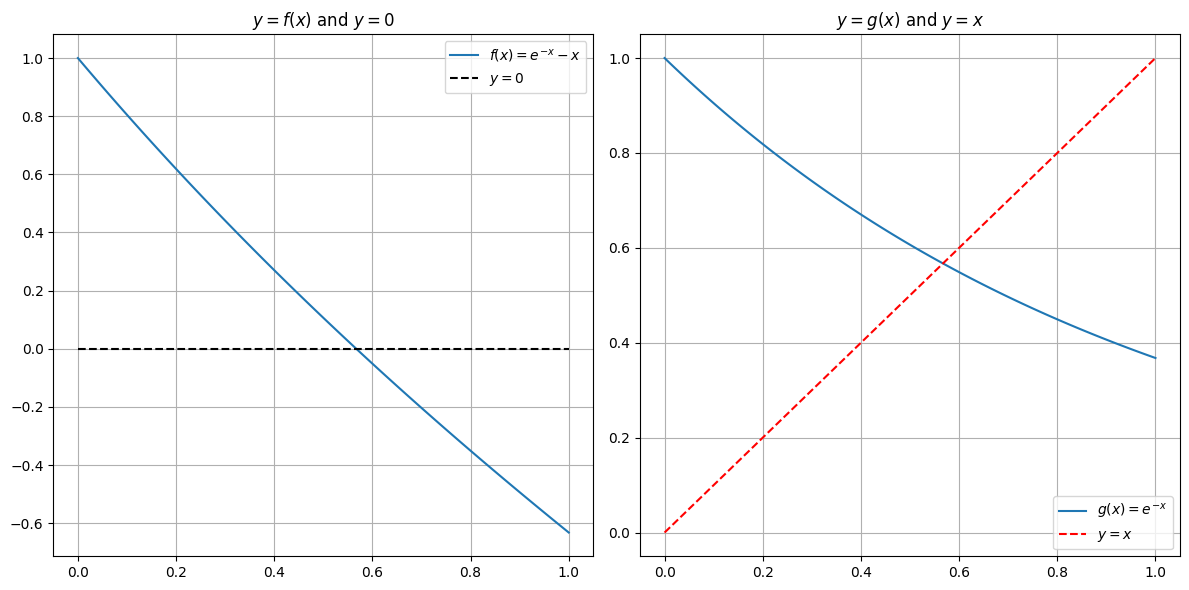

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# f(x)
axs[0].plot(x, [f(xi) for xi in x], label='$f(x) = e^{-x} - x$')
axs[0].plot([a, b], [0, 0], 'k--', label='$y=0$')
axs[0].set_title('$y = f(x)$ and $y=0$')
axs[0].grid(True)
axs[0].legend()

# g(x)
axs[1].plot(x, [g(xi) for xi in x], label='$g(x) = e^{-x}$')
axs[1].plot(x, x, 'r--', label='$y=x$')
axs[1].set_title('$y = g(x)$ and $y=x$')
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()

Solving x = exp(-x) starting to the left, at x_0 = 0
x_0 = 1.0000
x_1 = 0.3679
x_2 = 0.6922
x_3 = 0.5005
x_4 = 0.6062
x_5 = 0.5454
x_6 = 0.5796
x_7 = 0.5601
x_8 = 0.5711
x_9 = 0.5649
Solving x = exp(-x) starting to the right, at x_0 = 1
x_0 = 0.3679
x_1 = 0.6922
x_2 = 0.5005
x_3 = 0.6062
x_4 = 0.5454
x_5 = 0.5796
x_6 = 0.5601
x_7 = 0.5711
x_8 = 0.5649
x_9 = 0.5684


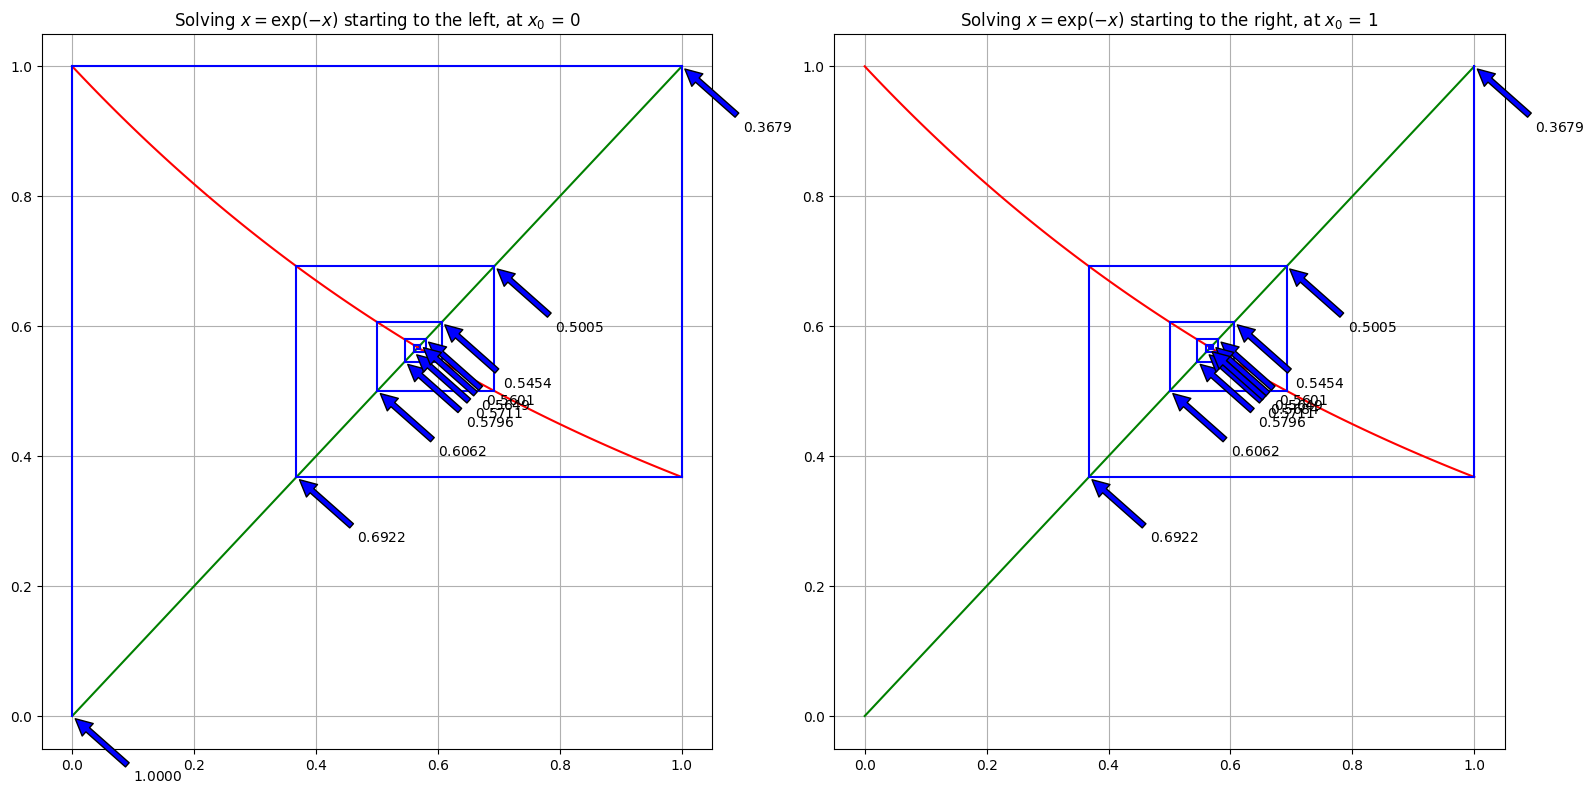

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Start at left
print(f"Solving x = exp(-x) starting to the left, at x_0 = {a}")
x_k = a
axs[0].set_title(f"Solving $x = \exp(-x)$ starting to the left, at $x_0$ = {a}")
axs[0].plot(x, x, 'g', label='$y = x$')
axs[0].plot(x, [g_1(xi) for xi in x], 'r', label='$y = \exp(-x)$')
axs[0].grid(True)
for k in range(iterations):
    x_k_plus_1 = g_1(x_k)
    axs[0].annotate(f'${x_k_plus_1:.4f}$', xy=(x_k, x_k), xytext=(x_k + 0.1, x_k - 0.1), arrowprops=dict(facecolor='blue', shrink=0.05))
    axs[0].plot([x_k, x_k], [x_k, x_k_plus_1], 'b')
    axs[0].plot([x_k, x_k_plus_1], [x_k_plus_1, x_k_plus_1], 'b')
    x_k = x_k_plus_1
    print(f"x_{k} = {x_k_plus_1:.4f}")

# Start at right
print(f"Solving x = exp(-x) starting to the right, at x_0 = {b}")
x_k = b
axs[1].set_title(f"Solving $x = \exp(-x)$ starting to the right, at $x_0$ = {b}")
axs[1].plot(x, x, 'g', label='$y = x$')
axs[1].plot(x, [g_1(xi) for xi in x], 'r', label='$y = \exp(-x)$')
axs[1].grid(True)
for k in range(iterations):
    x_k_plus_1 = g_1(x_k)
    axs[1].annotate(f'${x_k_plus_1:.4f}$', xy=(x_k, x_k), xytext=(x_k + 0.1, x_k - 0.1), arrowprops=dict(facecolor='blue', shrink=0.05))
    axs[1].plot([x_k, x_k], [x_k, x_k_plus_1], 'b')
    axs[1].plot([x_k, x_k_plus_1], [x_k_plus_1, x_k_plus_1], 'b')
    x_k = x_k_plus_1
    print(f"x_{k} = {x_k_plus_1:.4f}")

plt.tight_layout()
plt.show()

### Question 2 (Numerical Integration)

Use Simpson’s rule and appropriate Gaussian quadrature to evaluate the following integral accurate up to 6 places in decimal.

$$ \int_0^1 \sqrt{(1 + x^4)}$$


In [6]:
def f(x):
    return math.sqrt(1 + x**4)

In [7]:
# Simpson's Rule implementation
def simpsons_rule(f, a, b, n):
    h = (b - a) / n
    sum1 = 0
    sum2 = 0
    for i in range(1, n, 2):
        sum1 += f(a + i * h)
    for i in range(2, n-1, 2):
        sum2 += f(a + i * h)
    integral = h/3 * (f(a) + 4 * sum1 + 2 * sum2 + f(b))
    return integral

# Gaussian Quadrature implementation using Legendre polynomial roots
def gaussian_quadrature(f, a, b, n):
    # Precomputed roots and weights for n = 3 (to avoid hardcoding)
    roots = [-math.sqrt(0.6), 0, math.sqrt(0.6)]
    weights = [5/9, 8/9, 5/9]
    x_mapped = [0.5 * (b - a) * root + 0.5 * (a + b) for root in roots]
    integral = 0.5 * (b - a) * sum(weight * f(x) for weight, x in zip(weights, x_mapped))
    return integral

In [8]:
# results using both methods
integral_simpsons = simpsons_rule(f, 0, 1, 1000)
integral_gaussian = gaussian_quadrature(f, 0, 1, 3)

print("Using Simpson's Rule:", round(integral_simpsons, 6))
print("Using Gaussian Quadrature:", round(integral_gaussian, 6))

Using Simpson's Rule: 1.089429
Using Gaussian Quadrature: 1.089459


### Question 3 (RK4 ODE Solving)

Solve the following ODE with RK4 with interval sizes 0.5, 0.2, 0.05 and 0.01
$$y′= \frac{5x^2 −y}{\exp{(x+y)}}$$
where $y(0) = 1.0$.
Tabulate your results.


In [9]:
def f(x, y):
    return (5 * x**2 - y)/math.exp(x+y)

In [10]:
# RK4 method
def rk4_step(x, y, h):
    k1 = h * f(x, y)
    k2 = h * f(x + h/2, y + k1/2)
    k3 = h * f(x + h/2, y + k2/2)
    k4 = h * f(x + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

# Initial conditions
x0 = 0
y0 = 1.0

# interval sizes
interval_sizes = [0.5, 0.2, 0.05, 0.01]

# table header
print("Interval Size   Approximation y(1)")
print("----------------------------------")

for h in interval_sizes:
    x = x0
    y = y0
    
    while x < 1:  
        y = rk4_step(x, y, h)
        x += h
    
    print(f"    {h}             {y:.6f}")

Interval Size   Approximation y(1)
----------------------------------
    0.5             1.071926
    0.2             1.071586
    0.05             1.071578
    0.01             1.071578


In [11]:
# table header
print("Interval Size   Approximation y(8)")
print("----------------------------------")

for h in interval_sizes:
    x = x0
    y = y0
    
    while x < 8:  
        y = rk4_step(x, y, h)
        x += h
    
    print(f"    {h}             {y:.6f}")

Interval Size   Approximation y(8)
----------------------------------
    0.5             2.435043
    0.2             2.434939
    0.05             2.435394
    0.01             2.435030


### Question 4 (Heat Equation)

Solve the heat equation $u_{t}= 4u_{xx}$, using Crank-Nicolson and your choice of $\alpha$, subjected to the boundary conditions
$u(0,t) = 0 = u(8,t)$ and $u(x,0) = 4x −x^2/2$. Since matrix inversion is not taught in class, you may use ready-made available routines for the purpose. Comment on your choice of α and inversion algorithm. Display the solution both in a table and a contour plot.

In [12]:
# LIBRARY
# vector manipulation and matrix manipulation from external LIBRARY is allowed.
import numpy as np

In [13]:
N = 20
Nt = 400
h = 8 / N
k = 1 / Nt
r = k / (h * h)
time_steps = 500
time = np.arange(0, (time_steps + 0.5) * k, k)
x = np.arange(0, 8.0001, h)
X, Y = np.meshgrid(x, time)

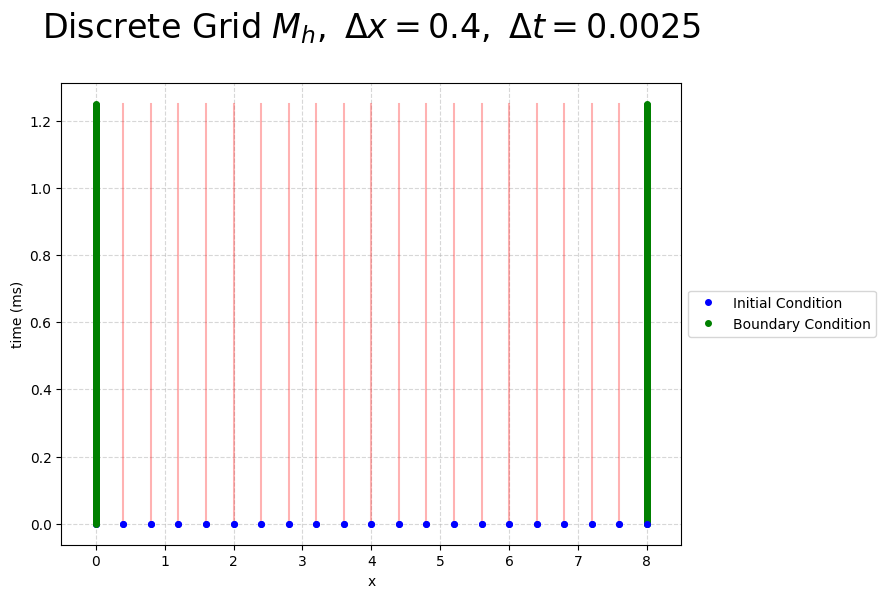

In [14]:
fig = plt.figure(figsize=(8, 6))
plt.plot(X, Y, 'r-', alpha=0.3)  
plt.plot(x, 0 * x, 'bo', markersize=4, label='Initial Condition')  
plt.plot(np.ones(time_steps + 1) * 8, time, 'go', markersize=4, label='Boundary Condition')  
plt.plot(x, 0 * x, 'bo', markersize=4)
plt.plot(0 * time, time, 'go', markersize=4)
plt.xlim((-0.5, 8.5))  
#plt.ylim((0, 0.055))   
plt.xlabel('x')
plt.ylabel('time (ms)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $M_h,$ $\Delta x= %s,$ $\Delta t=%s$' % (h, k), fontsize=24, y=1.08)
plt.grid(True, linestyle='--', alpha=0.5)  # Add grid lines
plt.show()

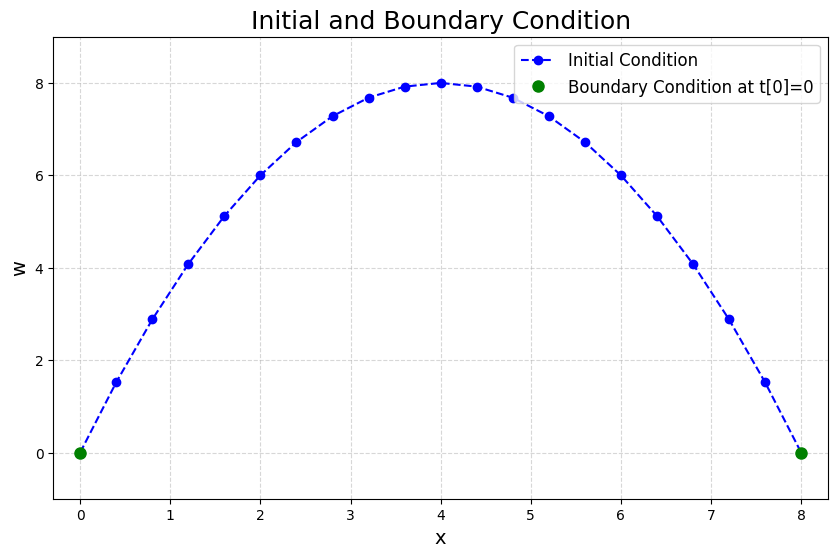

In [15]:
u = np.zeros((N+1, time_steps+1))
b = np.zeros(N-1)

# Initial Condition
for i in range(1, N):
    u[i, 0] = 4 * x[i] - x[i] * x[i] / 2

# Boundary Condition
u[0, :] = 0
u[N, :] = 0

# Plot
fig = plt.figure(figsize=(10, 6))

# Initial and Boundary Condition at t[0]=0
plt.plot(x, u[:, 0], 'o--', color='blue', label='Initial Condition')
plt.plot(x[[0, N]], u[[0, N], 0], 'go', markersize=8, label='Boundary Condition at t[0]=0')

plt.xlim([-0.3, 8.3])
plt.ylim([-1, 9])
plt.title('Initial and Boundary Condition', fontsize=18)
plt.xlabel('x', fontsize=14)
plt.ylabel('w', fontsize=14)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

The implicit Crank-Nicolson difference equation of the Heat Equation is given by:

$$
\frac{U_{i,j+1}-U_{i,j}}{k} = 4 \times \frac{1}{2}\left(\frac{U_{i+1j+1}-2U_{ij+1}+U_{i-1j+1}}{h^2}+\frac{U_{i+1j}-2U_{ij}+U_{i-1j}}{h^2}\right)
$$

Rearranging the equation, we get:

$$
-\alpha U_{i-1j+1} + (\frac{1}{2}+2\alpha)U_{ij+1} - \alpha U_{i+1j+1} = \alpha U_{i-1j} + (\frac{1}{2}-2\alpha)U_{ij} + \alpha U_{i+1j}
$$

for $(i = 1, \ldots, 9)$, where $(\alpha = \frac{k}{h^2})$.


This can be written in matrix form as:

$$
(I/2 + \alpha B)\mathbf{U}_{j} = (I/2 - \alpha B)\mathbf{U}_{j-1}
$$

for which $A$ is a $9 \times 9$ matrix:

$$
(I/2 + \alpha B) = \begin{pmatrix}
1/2+2\alpha & -\alpha & 0 & 0 & 0 & 0 & 0 & 0 \\
-\alpha & 1/2+2\alpha & -\alpha & 0 & 0 & 0 & 0 & 0 \\
0 & -\alpha & 1/2+2\alpha & -\alpha & 0 & 0 & 0 & 0 \\
0 & 0 & -\alpha & 1/2+2\alpha & -\alpha & 0 & 0 & 0 \\
0 & 0 & 0 & -\alpha & 1/2+2\alpha & -\alpha & 0 & 0 \\
0 & 0 & 0 & 0 & -\alpha & 1/2+2\alpha & -\alpha & 0 \\
0 & 0 & 0 & 0 & 0 & -\alpha & 1/2+2\alpha & -\alpha \\
0 & 0 & 0 & 0 & 0 & 0 & -\alpha & 1/2+2\alpha \\
\end{pmatrix}
$$

$B$ is another $9 \times 9$ matrix:

$$
(I/2 - \alpha B) = \begin{pmatrix}
1/2-2\alpha & \alpha & 0 & 0 & 0 & 0 & 0 & 0 \\
\alpha & 1/2-2\alpha & \alpha & 0 & 0 & 0 & 0 & 0 \\
0 & \alpha & 1/2-2\alpha & \alpha & 0 & 0 & 0 & 0 \\
0 & 0 & \alpha & 1/2-2\alpha & \alpha & 0 & 0 & 0 \\
0 & 0 & 0 & \alpha & 1/2-2\alpha & \alpha & 0 & 0 \\
0 & 0 & 0 & 0 & \alpha & 1/2-2\alpha & \alpha & 0 \\
0 & 0 & 0 & 0 & 0 & \alpha & 1/2-2\alpha & \alpha \\
0 & 0 & 0 & 0 & 0 & 0 & \alpha & 1/2-2\alpha \\
\end{pmatrix}
$$

$\mathbf{V}_j$ is a column vector of size 9 containing $V_{ij}$ values, $\mathbf{b}_j$ and $\mathbf{b}_{j+1}$ are column vectors of size 9 representing the boundary conditions for the current and next time steps, respectively.

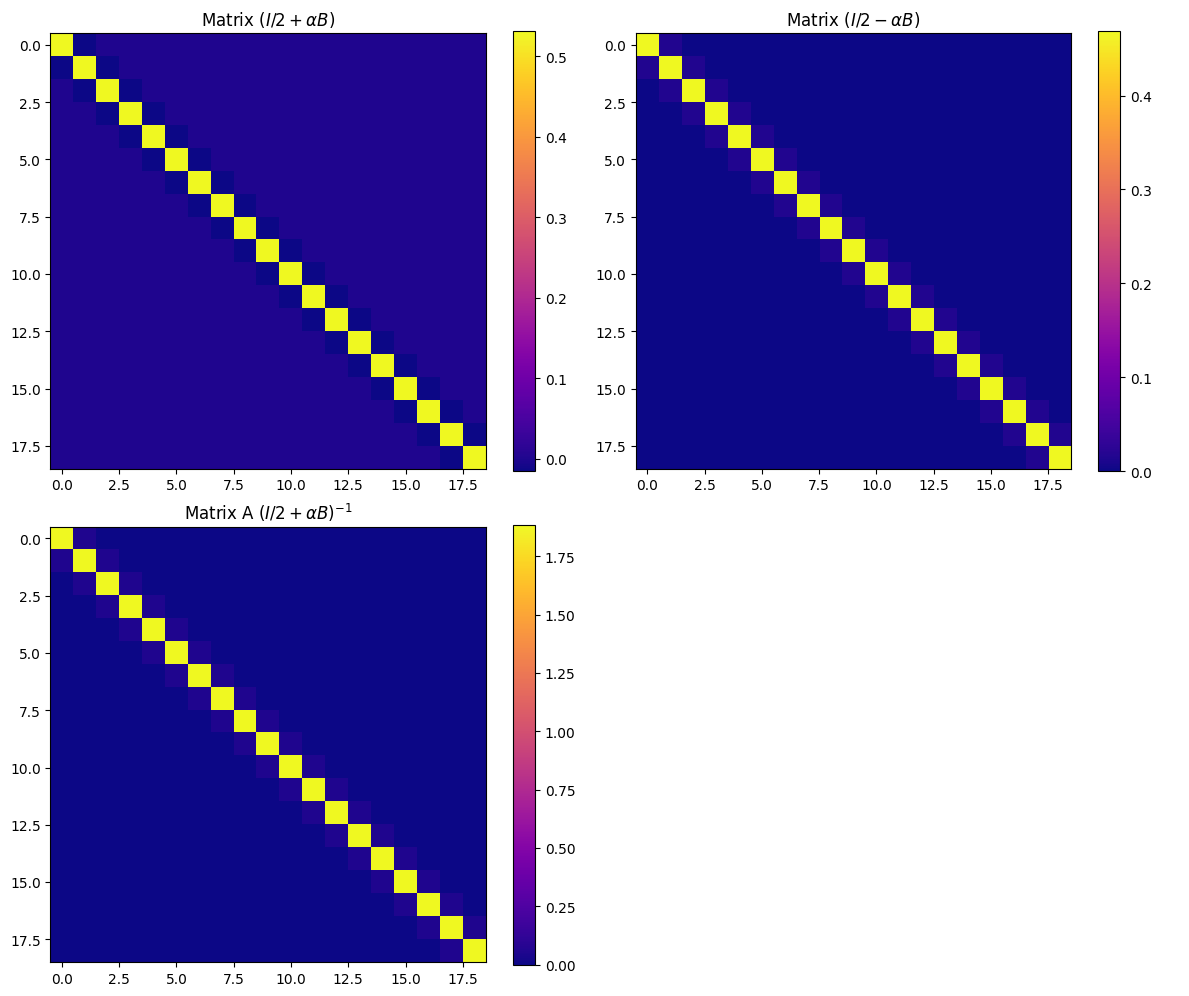

In [16]:
#  A and B
A = np.zeros((N-1, N-1))
B = np.zeros((N-1, N-1))
for i in range(N-1):
    A[i, i] = 1/2 + 2 * r
    B[i, i] = 1/2 - 2 * r
    if i < N-2:
        A[i, i+1] = -r
        A[i+1, i] = -r
        B[i, i+1] = r
        B[i+1, i] = r

# inverse of A
A_inv = np.linalg.inv(A)

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
im = axs[0, 0].imshow(A, cmap='plasma')
axs[0, 0].set_title(r'Matrix $(I/2 + \alpha B)$')
plt.colorbar(im, ax=axs[0, 0])
im = axs[0, 1].imshow(B, cmap='plasma')
axs[0, 1].set_title(r'Matrix $(I/2 - \alpha B)$')
plt.colorbar(im, ax=axs[0, 1])
im = axs[1, 0].imshow(A_inv, cmap='plasma')
axs[1, 0].set_title(r'Matrix A $(I/2 + \alpha B)^{-1}$')
plt.colorbar(im, ax=axs[1, 0])
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()

In [17]:
for j in range (1,time_steps+1):
    b[0]=r*u[0,j-1]+r*u[0,j]
    b[N-2]=r*u[N,j-1]+r*u[N,j]
    v=np.dot(B,u[1:(N),j-1])
    u[1:(N),j]=np.dot(A_inv,v+b)

Solution of the Heat Equation:
-------------------------------
   x     |   t=0   |   t=0.1   |   t=0.2   |   ...   |   t=end   
---------------------------------------------------------------
  0.00  |  0.0000  |  0.0000  |  0.0000  |  ...  |  0.0000
  0.40  |  1.5200  |  1.3877  |  1.3073  |  ...  |  0.5985
  0.80  |  2.8800  |  2.6992  |  2.5590  |  ...  |  1.1822
  1.20  |  4.0800  |  3.8846  |  3.7100  |  ...  |  1.7368
  1.60  |  5.1200  |  4.9210  |  4.7303  |  ...  |  2.2485
  2.00  |  6.0000  |  5.8002  |  5.6032  |  ...  |  2.7048
  2.40  |  6.7200  |  6.5200  |  6.3209  |  ...  |  3.0944
  2.80  |  7.2800  |  7.0800  |  6.8802  |  ...  |  3.4079
  3.20  |  7.6800  |  7.4800  |  7.2801  |  ...  |  3.6374
  3.60  |  7.9200  |  7.7200  |  7.5200  |  ...  |  3.7774
  4.00  |  8.0000  |  7.8000  |  7.6000  |  ...  |  3.8245
  4.40  |  7.9200  |  7.7200  |  7.5200  |  ...  |  3.7774
  4.80  |  7.6800  |  7.4800  |  7.2801  |  ...  |  3.6374
  5.20  |  7.2800  |  7.0800  |  6.8802 

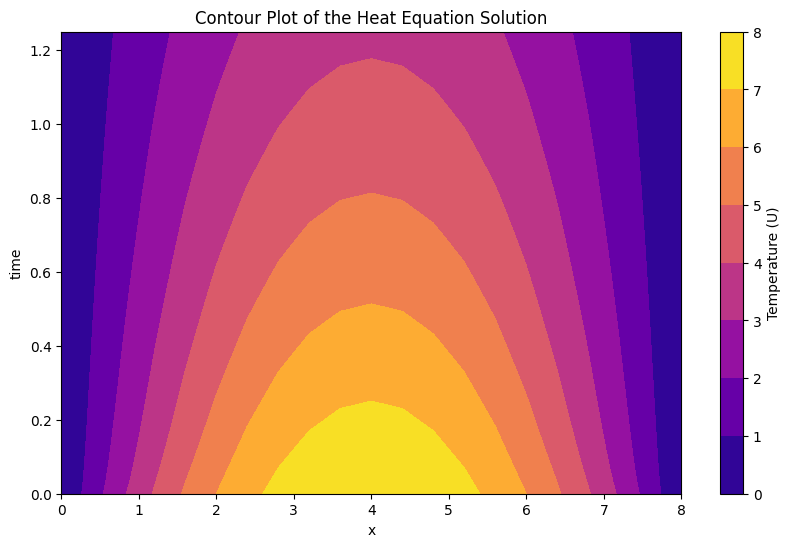

In [18]:
# Displaying solution in a table
print("Solution of the Heat Equation:")
print("-------------------------------")
print("   x     |   t=0   |   t=0.1   |   t=0.2   |   ...   |   t=end   ")
print("---------------------------------------------------------------")
for i in range(N+1):
    print(f"  {x[i]:.2f}  |  {u[i,0]:.4f}  |  {u[i,20]:.4f}  |  {u[i,40]:.4f}  |  ...  |  {u[i,-1]:.4f}")

# Displaying solution in a contour plot
plt.figure(figsize=(10, 6))
plt.contourf(X, Y, u.transpose(), cmap='plasma')
plt.colorbar(label='Temperature (U)')
plt.xlabel('x')
plt.ylabel('time')
plt.title('Contour Plot of the Heat Equation Solution')
plt.show()

The choice of $\alpha$ does not impact the Crank-Nicolson method as it is unconditionally stable. `np.linalg.inv` from NumPy was used for matrix inversion due to its efficiency, accuracy, and widespread support in numerical computations.

### Question 5 (Poisson's Equation)


Consider the Poisson’s equation:

$$
u_{xx} + u_{yy} = x e^y
$$

on a $6^2$ grid with the following boundary conditions:


\begin{align*}
&u(0, y) = 0 \\
&u(2, y) = 2e^y \\
&u(x, 0) = x \\
&u(x, 1) = xe
\end{align*}

Display the solution both in a table and a 3-D plot. 


In [19]:
import plotly.graph_objects as go # for 3D plots

In [20]:
N = 6
h = 1 / (N - 1)  # Adjusted for 6x6 grid
x = np.linspace(0, 2, N)
y = np.linspace(0, 1, N)
X, Y = np.meshgrid(x, y)

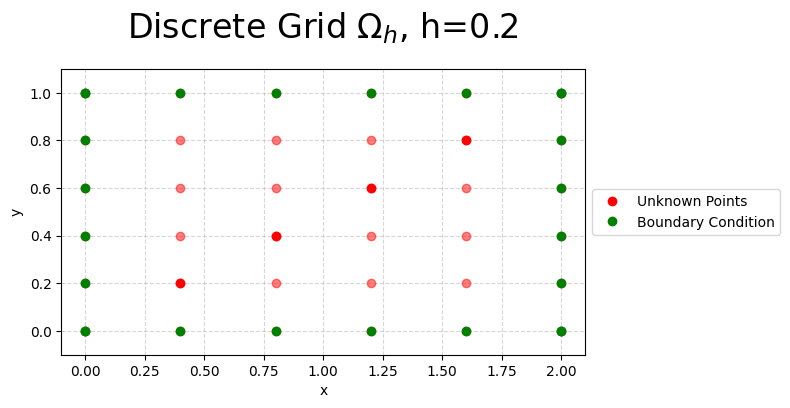

In [21]:
fig = plt.figure(figsize=(8, 6))
plt.plot(x[1:-1], y[1:-1], 'ro', label='Unknown Points')  
plt.plot(X, Y, 'ro', markersize=6, alpha=0.5)  
plt.plot(2*np.ones(N), y, 'go', label='Boundary Condition')
plt.plot(np.zeros(N), y, 'go')
plt.plot(x, np.zeros(N), 'go')
plt.plot(x, np.ones(N), 'go')
plt.xlim((-0.1, 2.1))
plt.ylim((-0.1, 1.1))
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(r'Discrete Grid $\Omega_h$, h=%s' % (h), fontsize=24, y=1.08)
plt.grid(True, linestyle='--', alpha=0.5)  
plt.tight_layout()
plt.show()

In [22]:
u = np.zeros((N, N))

for i in range(0, N-1):
    u[i, 0] = x[i]  # Left Boundary
    u[i, N-1] = x[i] * np.exp(1)  # Right Boundary

for j in range(0,N-1):
    u[0, j] = 0  # Lower Boundary
    u[N-1, j] = 2 * np.exp(y[j])  # Upper Boundary

In [23]:
surface = go.Surface(x=X, y=Y, z=u, colorscale='plasma')

layout = go.Layout(
    title='Boundary Values',
    scene=dict(
        xaxis=dict(title='x'),
        yaxis=dict(title='y'),
        zaxis=dict(title='w')
    )
)

fig = go.Figure(data=[surface], layout=layout)
fig.show()


In [24]:
N2=(N-1)*(N-1)
A=np.zeros((N2,N2))

## Diagonal            
for i in range (0,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j]=-4

# LOWER DIAGONAL        
for i in range (1,N-1):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j-1]=1   
# UPPPER DIAGONAL        
for i in range (0,N-2):
    for j in range (0,N-1):           
        A[i+(N-1)*j,i+(N-1)*j+1]=1   

# LOWER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (1,N-1):           
        A[i+(N-1)*j,i+(N-1)*(j-1)]=1        
        
        
# UPPER IDENTITY MATRIX
for i in range (0,N-1):
    for j in range (0,N-2):           
        A[i+(N-1)*j,i+(N-1)*(j+1)]=1
Ainv=np.linalg.inv(A)   

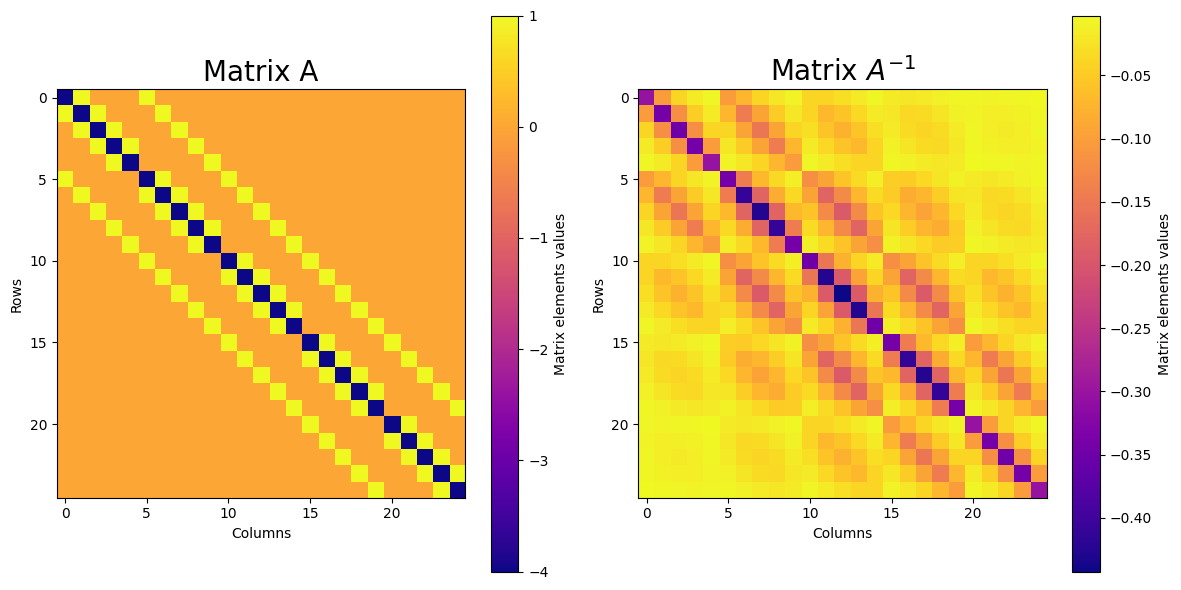

In [25]:
fig = plt.figure(figsize=(12, 6))

# Plot Matrix A
plt.subplot(121)
plt.imshow(A, interpolation='none', cmap='plasma')
plt.colorbar(label='Matrix elements values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title('Matrix A', fontsize=20)

# Plot Matrix A inverse
plt.subplot(122)
plt.imshow(Ainv, interpolation='none', cmap='plasma')
plt.colorbar(label='Matrix elements values')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.title(r'Matrix $A^{-1}$', fontsize=20)

fig.tight_layout()
plt.show()

In [26]:
r=np.zeros(N2)

# vector r      
for i in range (0,N-1):
    for j in range (0,N-1):           
        r[i+(N-1)*j]= h*(x[i+1]*np.exp(h*y[j+1]))    
 
# Boundary        
b_bottom_top=np.zeros(N2)
for i in range (0,N-1):
    b_bottom_top[i]= x[i+1] #Bottom Boundary
    b_bottom_top[i+(N-1)*(N-2)]=x[i+1]*np.exp(1)# Top Boundary
      
b_left_right=np.zeros(N2)
for j in range (0,N-1):
    b_left_right[(N-1)*j]=0 # Left Boundary
    b_left_right[N-2+(N-1)*j]=2*np.exp(y[j+1])# Right Boundary
    
b=b_left_right+b_bottom_top


C=np.dot(Ainv,r-b)
u[1:N,1:N]=C.reshape((N-1,N-1))

In [27]:
print("Solution of the Poisson Equation:")
print("-" * 35)
print("x\t\ty\t\tw")
print("-" * 35)
for i in range(N-1):
    for j in range(N-1):
        print(f"{x[i+1]:.4f}       {y[j+1]:.4f}          {u[i+1, j+1]:.4f}")

Solution of the Poisson Equation:
-----------------------------------
x		y		w
-----------------------------------
0.4000       0.2000          0.3346
0.4000       0.4000          0.6793
0.4000       0.6000          1.0461
0.4000       0.8000          1.4511
0.4000       1.0000          1.9133
0.8000       0.2000          0.3424
0.8000       0.4000          0.7028
0.8000       0.6000          1.1040
0.8000       0.8000          1.5780
0.8000       1.0000          2.1755
1.2000       0.2000          0.4187
1.2000       0.4000          0.8591
1.2000       0.6000          1.3488
1.2000       0.8000          1.9282
1.2000       1.0000          2.6605
1.6000       0.2000          0.5634
1.6000       0.4000          1.1465
1.6000       0.6000          1.7746
1.6000       0.8000          2.4864
1.6000       1.0000          3.3448
2.0000       0.2000          0.7824
2.0000       0.4000          1.5766
2.0000       0.6000          2.3984
2.0000       0.8000          3.2735
2.0000       1.0000   

In [28]:
surface = go.Surface(x=X, y=Y, z=u, colorscale='plasma')

layout = go.Layout(
    title='Numerical Solution of Poisson Equation',
    scene=dict(
        xaxis=dict(title='x'),
        yaxis=dict(title='y'),
        zaxis=dict(title='w')
    )
)

fig = go.Figure(data=[surface], layout=layout)
fig.show()